## 1. Библиотеки

### 1.1 Основные + настройки

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 14})
plt.style.use('fivethirtyeight')

%matplotlib inline
%config Inlinebackend.figure_format = 'svg'

### 1.2 Загрузка моделей и метрик

In [2]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [3]:
class Prepeare:
    
    def __init__(self, p):
        self.path = p
        
    def df(self):
        df = pd.read_csv(self.path)
        return df
    
    def index(self):
        df = self.df()
        df.set_index('Id', inplace=True)
        return df
    
    def split(self):
        df = self.index()
        if 'Price' in df:
            X = df.drop('Price', axis=1)
            y = df['Price']
            return X, y
        else:
            return df

In [4]:
def FMedian(df):
    median = X['Healthcare_1'].median()
    df['Healthcare_1'] = df['Healthcare_1'].fillna(median)

In [5]:
def SEmissins(X, Y): # показывает разброс показателей
    plt.scatter(X, Y)
    plt.title(f'{X.name} and {Y.name}')
    plt.ylabel(f'{Y.name}')
    plt.xlabel(f'{X.name}')
    plt.show()
    print(
        f'"{Y.name}"\n' 
        f'median\t= {Y.median()}\n'
        f'mode\t= {Y.mode()[0]}\n'
        f'mean\t= {Y.mean()}'
    )

In [6]:
def CFeauters_up(df):
    df[df['KitchenSquare'] >= 250] = X['KitchenSquare'].median()

In [7]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [8]:
def del_columns(df):
    df = df.drop(['Ecology_2', 'Ecology_3', 'Shops_2', 'LifeSquare'], axis=1)
    return df

## 2. Чтение данных

In [9]:
PATH_TO_TRAIN = 'train.csv'
PATH_TO_TEST = 'test.csv'

In [10]:
X = Prepeare(PATH_TO_TRAIN).split()[0]
y = Prepeare(PATH_TO_TRAIN).split()[1]
X_final = Prepeare(PATH_TO_TEST).split()

## 3. Очистка данных

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
dtypes: float64(7), int64(8), object(3)
memory usage: 1.4+ MB


### 3.1 Заполнение пропусков

Эмпирическим путём, т.е. уже после тестирования модели, было выявленно -недостаток каких данные негативно влияет на модель - их было решено заполнить медианой.

In [12]:
FMedian(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
dtypes: float64(7), int64(8), object(3)
memory usage: 1.4+ MB


### 3.2 Обработка выбрасов

### KitchenSquare

Мы обнаружиди едийнственный выброс, который негативно повлиял на модель - исправляем через медиану

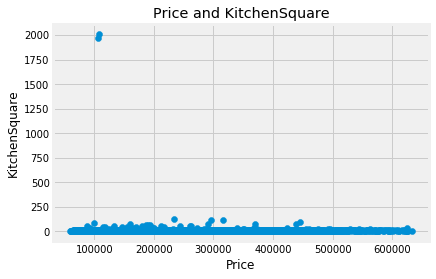

"KitchenSquare"
median	= 6.0
mode	= 1.0
mean	= 6.2733


In [13]:
SEmissins(y, X['KitchenSquare']) # просмотр выбрасов

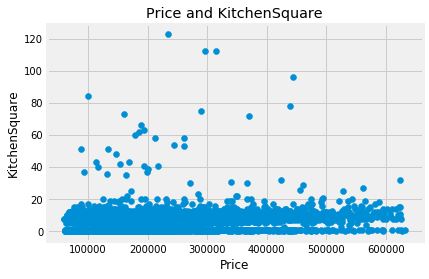

"KitchenSquare"
median	= 6.0
mode	= 1.0
mean	= 5.8761


In [14]:
CFeauters_up(X)

SEmissins(y, X['KitchenSquare'])

## 4. Фичи

Ввиду отсутствия опыта у исследователя, все им придуманные фичи оказались не эффективны, по этому просто ищем переменные - обивающие модель и удаляем

### 4.1 Удаление лишних столбцов

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
Shops_2          10000 non-null object
dtypes: float64(15), object(3)
memory usage: 1.4+ MB


In [16]:
X = del_columns(X)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 14 columns):
DistrictId       10000 non-null float64
Rooms            10000 non-null float64
Square           10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null float64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null float64
Ecology_1        10000 non-null float64
Social_1         10000 non-null float64
Social_2         10000 non-null float64
Social_3         10000 non-null float64
Healthcare_1     10000 non-null float64
Helthcare_2      10000 non-null float64
Shops_1          10000 non-null float64
dtypes: float64(14)
memory usage: 1.1 MB


## 5. Обучение модели

Используем функцию - визуально отображающую разброс предсказанных целей

### 5.1 Разбиение на выборки

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

### 5.2 Градиент деревьев решений

R2:	0.872
RMSE:	33161.888
MSE:	1099710788.103


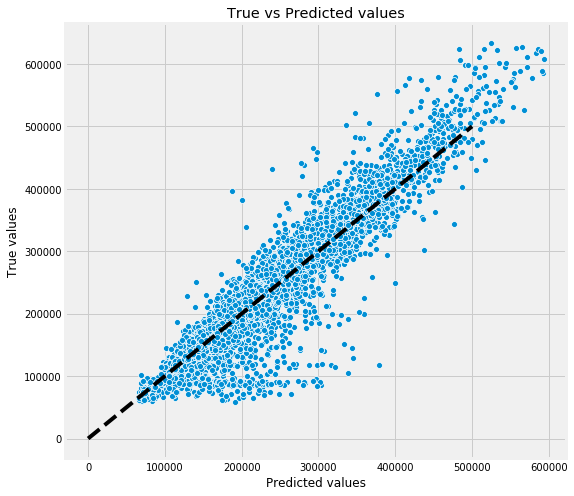

In [19]:
model = LGBMRegressor(
    criterion='mse',
    max_depth=6,
    n_estimators=200
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
evaluate_preds(y_train, y_train_pred)

R2:	0.785
RMSE:	43181.999
MSE:	1864685055.758


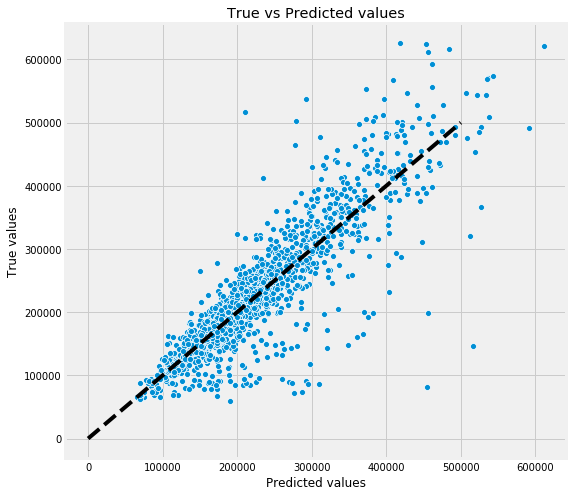

In [20]:
y_test_pred = model.predict(X_test)
evaluate_preds(y_test, y_test_pred)

### 5.3 Просмотр самых вашных параметров

In [21]:
feature_importances = pd.DataFrame(zip(
    X_train.columns,
    model.feature_importances_
), columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
2,Square,963
0,DistrictId,559
6,HouseYear,558
7,Ecology_1,372
4,Floor,357
3,KitchenSquare,337
10,Social_3,330
5,HouseFloor,294
11,Healthcare_1,254
8,Social_1,225


In [22]:
FMedian(X_final)
CFeauters_up(X_final)
X_final = del_columns(X_final)

In [23]:
y_pred_final = model.predict(X_final)

preds_final = pd.DataFrame()
preds_final['Id'] = X_final.index
preds_final['Price'] = y_pred_final
preds_final.to_csv('predictions.csv', index=False)

preds_final.head()

,Id,Price
0,725,156289.815146
1,15856,222935.049420
2,5480,190597.441070
3,15664,381705.064255
4,14275,140978.020653
